In [2]:
import pandas as pd
df = pd.read_csv('weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
df.shape

(145460, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

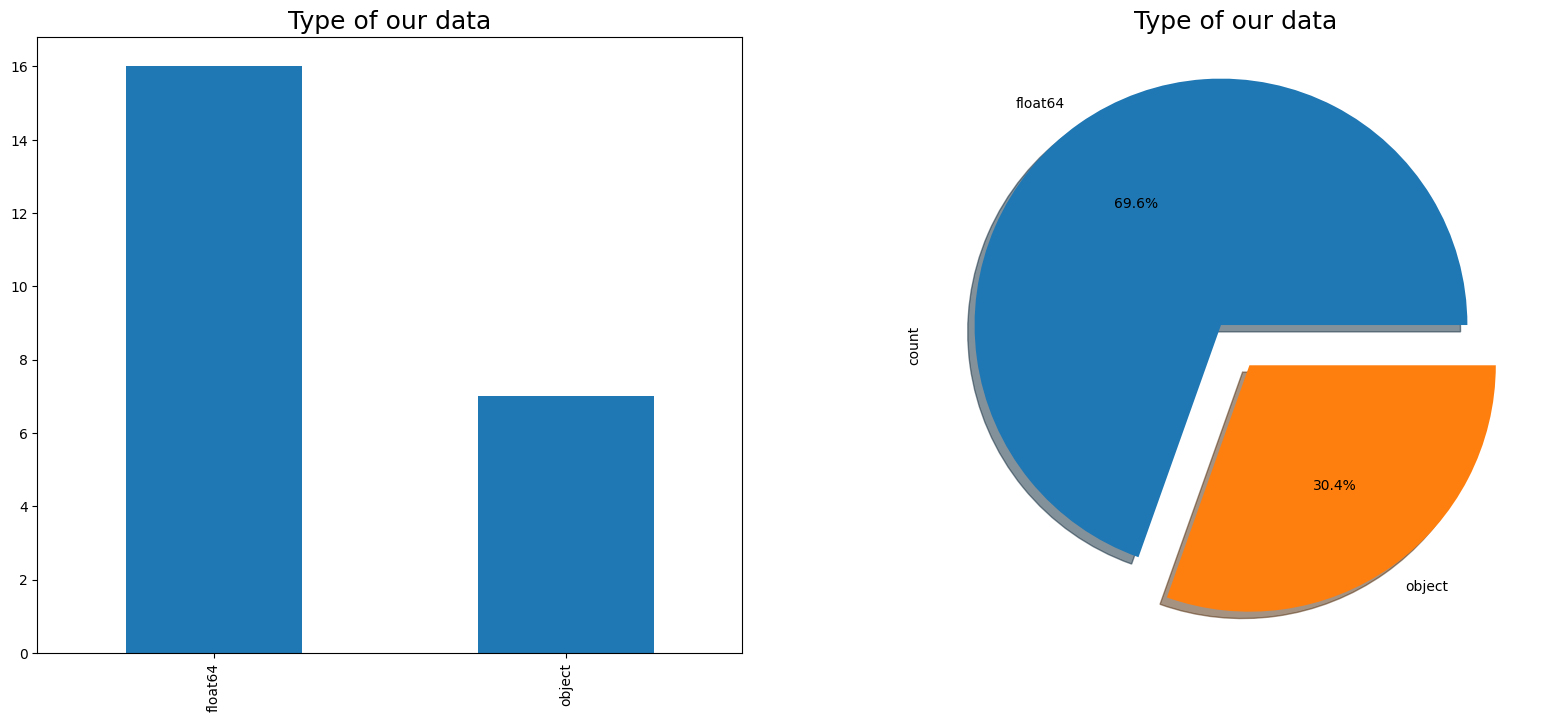

In [5]:
import matplotlib.pyplot as plt

# Create subplots
fig, axarr = plt.subplots(1, 2, figsize=(20, 8))

# Plot pie chart
df.dtypes.value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True, ax=axarr[1])
axarr[1].set_title("Type of our data", fontsize=18)

# Plot bar chart
df.dtypes.value_counts().plot(kind='bar', ax=axarr[0])
axarr[0].set_title("Type of our data", fontsize=18)

plt.show()


## “RainToday” and “RainTomorrow” are objects (Yes / No). I will convert them to binary (1/0) for our convenience.

In [6]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

C:\Users\aafta\AppData\Local\Temp\ipykernel_17556\3889771497.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
C:\Users\aafta\AppData\Local\Temp\ipykernel_17556\3889771497.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'

Next, we will check if the dataset is unbalanced or balanced. If the data set is unbalanced, we need to either downsample the majority or oversample the minority to balance it.

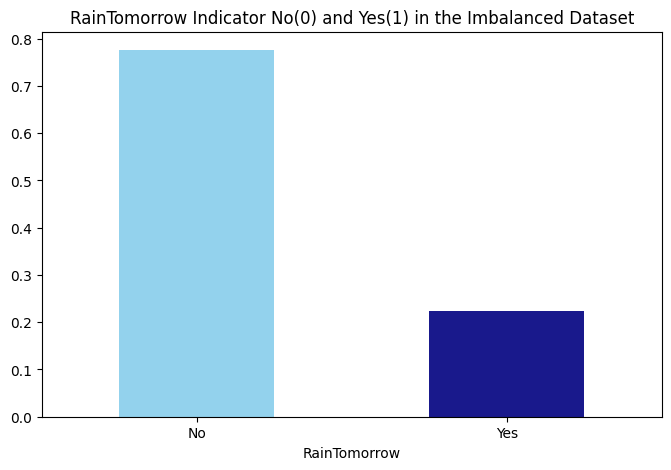

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Load your dataset
# Replace 'your_data.csv' with the path to your actual data file
full_data = pd.read_csv('weatherAUS.csv')

# Create the plot
fig = plt.figure(figsize=(8, 5))
full_data.RainTomorrow.value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'navy'], alpha=0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()


We can observe that the presence of “0” and “1” is almost in the 78:22 ratio. So there is a class imbalance and we have to deal with it. To fight against the class imbalance, we will use here the oversampling of the minority class. Since the size of the dataset is quite small, majority class subsampling wouldn’t make much sense here.

## Handling Class Imbalance For Rainfall Prediction

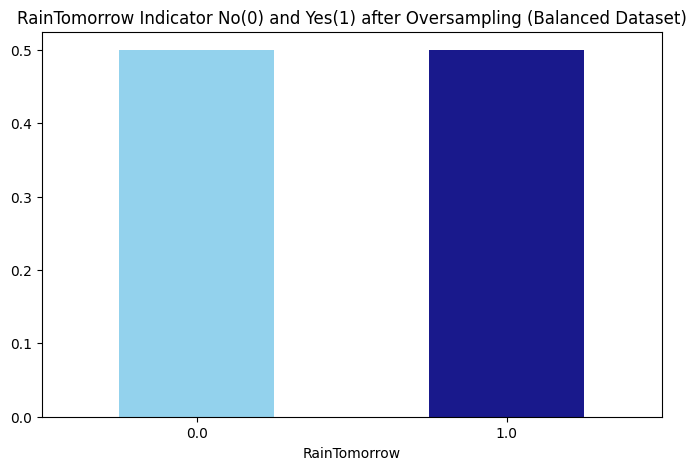

In [8]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

### Now, WE
 will now check the missing data model in the dataset:

In [9]:
# create a table with data missing 
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing , 
     'data type' : df.dtypes
}
frame=pd.DataFrame(value)
frame


missing_values   percent_missing % data type
Date                         0           0.000000    object
Location                     0           0.000000    object
MinTemp                   1485           1.020899   float64
MaxTemp                   1261           0.866905   float64
Rainfall                  3261           2.241853   float64
Evaporation              62790          43.166506   float64
Sunshine                 69835          48.009762   float64
WindGustDir              10326           7.098859    object
WindGustSpeed            10263           7.055548   float64
WindDir9am               10566           7.263853    object
WindDir3pm                4228           2.906641    object
WindSpeed9am              1767           1.214767   float64
WindSpeed3pm              3062           2.105046   float64
Humidity9am               2654           1.824557   float64
Humidity3pm               4507           3.098446   float64
Pressure9am              15065          10.356799   float64
Pressure3pm              15028          10.331363   float64
Cloud9am                 55888          38.421559   float64
Cloud3pm                 59358          40.807095   float64
Temp9am                   1767           1.214767   float64
Temp3pm                   3609           2.481094   float64
RainToday                 3261           2.241853   float64
RainTomorrow              3267           2.245978   float64

<Axes: >

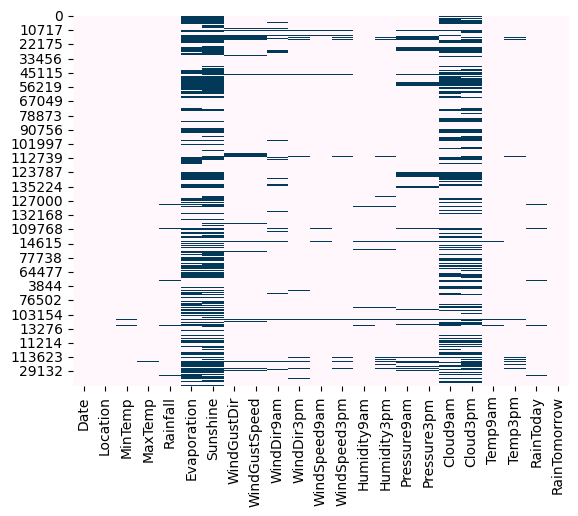

In [10]:
# Missing Data Pattern in Training Data
import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

Obviously, “Evaporation”, “Sunshine”, “Cloud9am”, “Cloud3pm” are the features with a high missing percentage. So we will check the details of the missing data for these 4 features.

In [11]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

Total   Percent
Sunshine     104831  0.475140
Evaporation   95411  0.432444
Cloud3pm      85614  0.388040
Cloud9am      81339  0.368664

We observe that the 4 features have less than 50 per cent missing data. So instead of rejecting them completely, we’ll consider them in our model with proper imputation.

## Imputation and Transformation
We will impute the categorical columns with mode, and then we will use the label encoder to convert them to numeric numbers. Once all the columns in the full data frame are converted to numeric columns, we will impute the missing values ​​using the Multiple Imputation by Chained Equations (MICE) package.

Then we will detect outliers using the interquartile range and remove them to get the final working dataset. Finally, we will check the correlation between the different variables, and if we find a pair of highly correlated variables, we will discard one while keeping the other.

In [12]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [13]:
# Impute categorical var with Mode
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [14]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [15]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [16]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1535.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.120044
Sunshine            5.979485
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.684676
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RainTomorrow        1.000000
dtype: float64


In [17]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(170669, 23)

We observe that the original dataset had the form (87927, 24). After running a code snippet for removing outliers, the dataset now has the form (86065, 24). As a result, the dataset is now free of 1862 outliers. We are now going to check multicollinearity, that is to say if a character is strongly correlated with another.

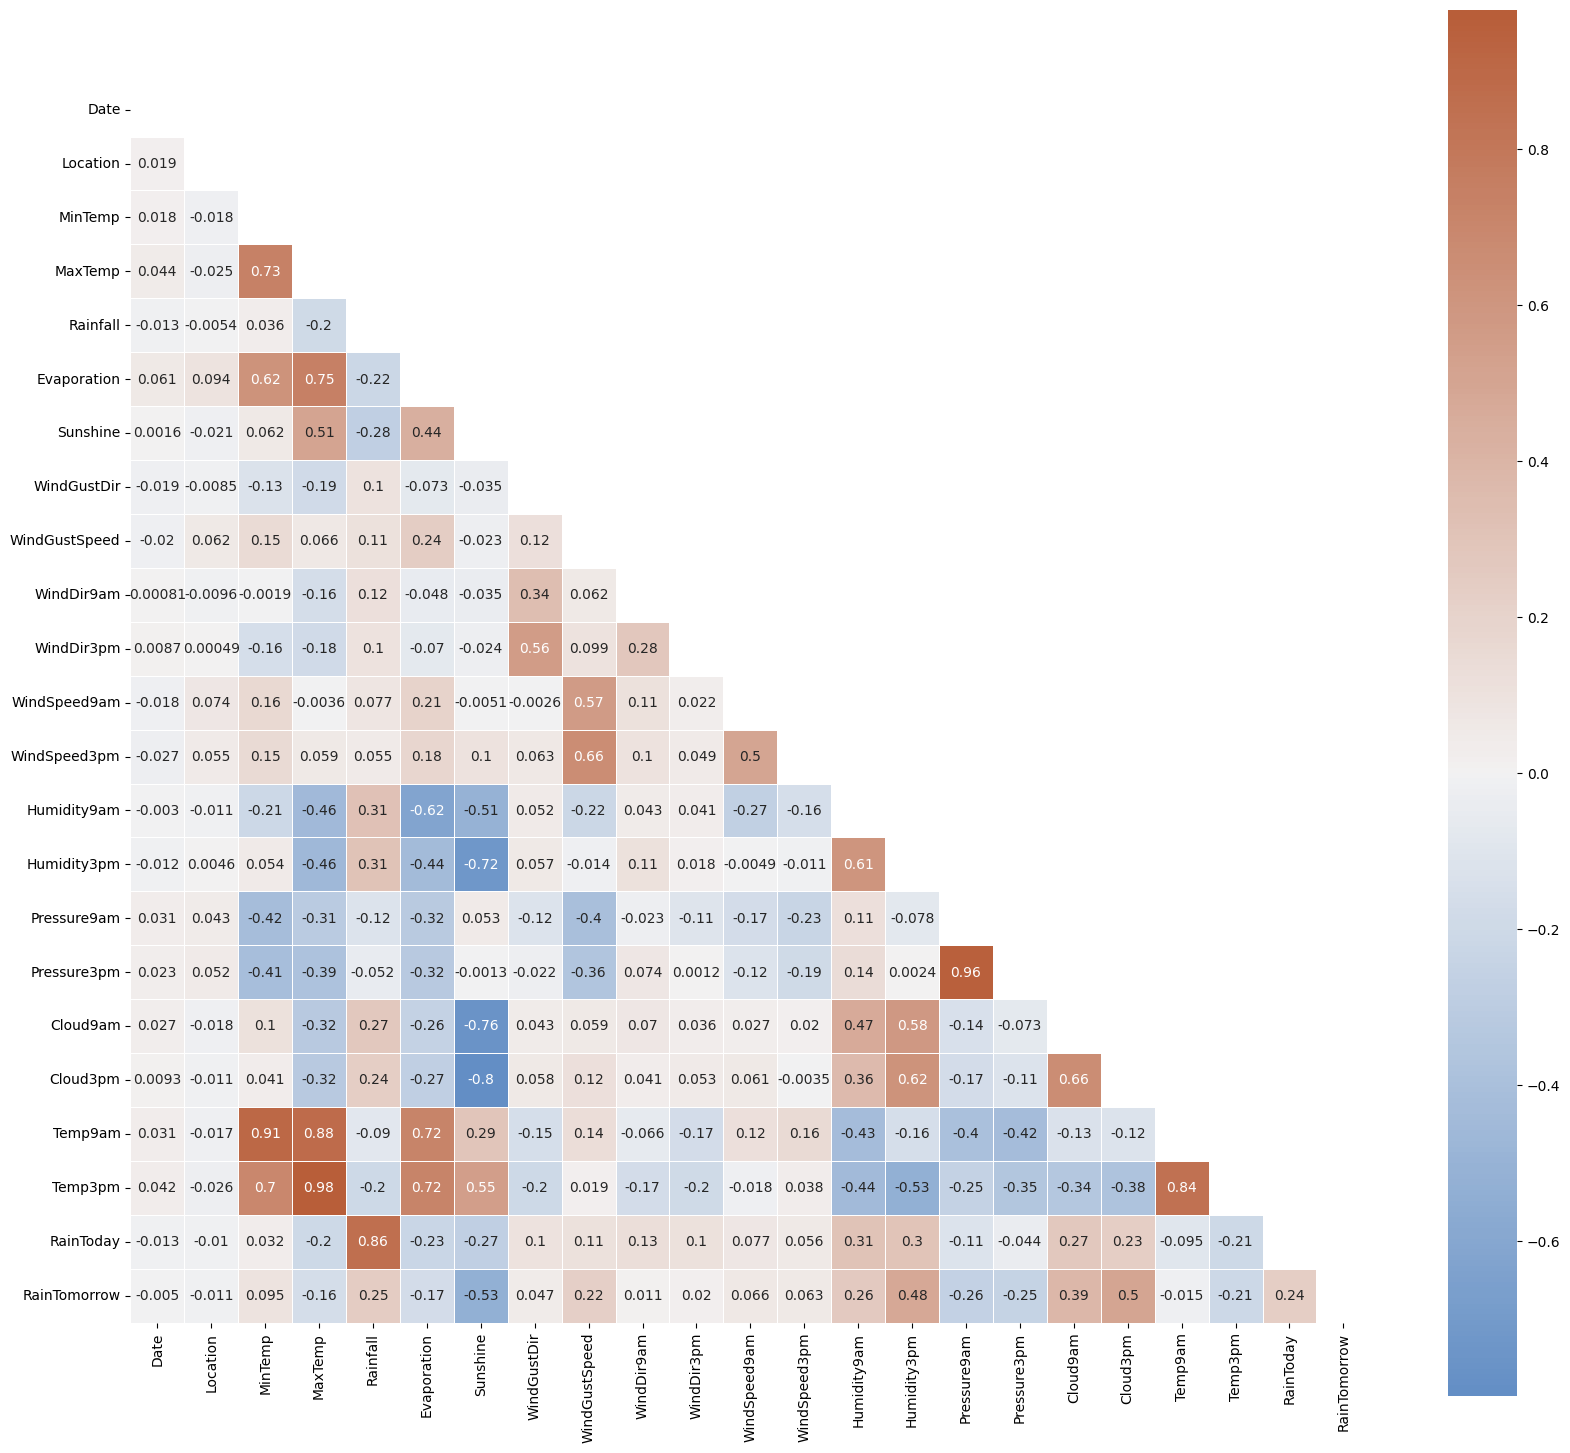

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr = MiceImputed.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 25, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0, square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

plt.show()


The following feature pairs have a strong correlation with each other:

     * MaxTemp and MinTemp
    * Pressure9h and pressure3h
    * Temp9am and Temp3pm
    * Evaporation and MaxTemp
    * MaxTemp and Temp3pm But in no case is the correlation value equal to a perfect “1”. We are therefore not removing any functionality

However, we can delve deeper into the pairwise correlation between these highly correlated characteristics by examining the following pair diagram. Each of the paired plots shows very clearly distinct clusters of RainTomorrow’s “yes” and “no” clusters. There is very minimal overlap between them.

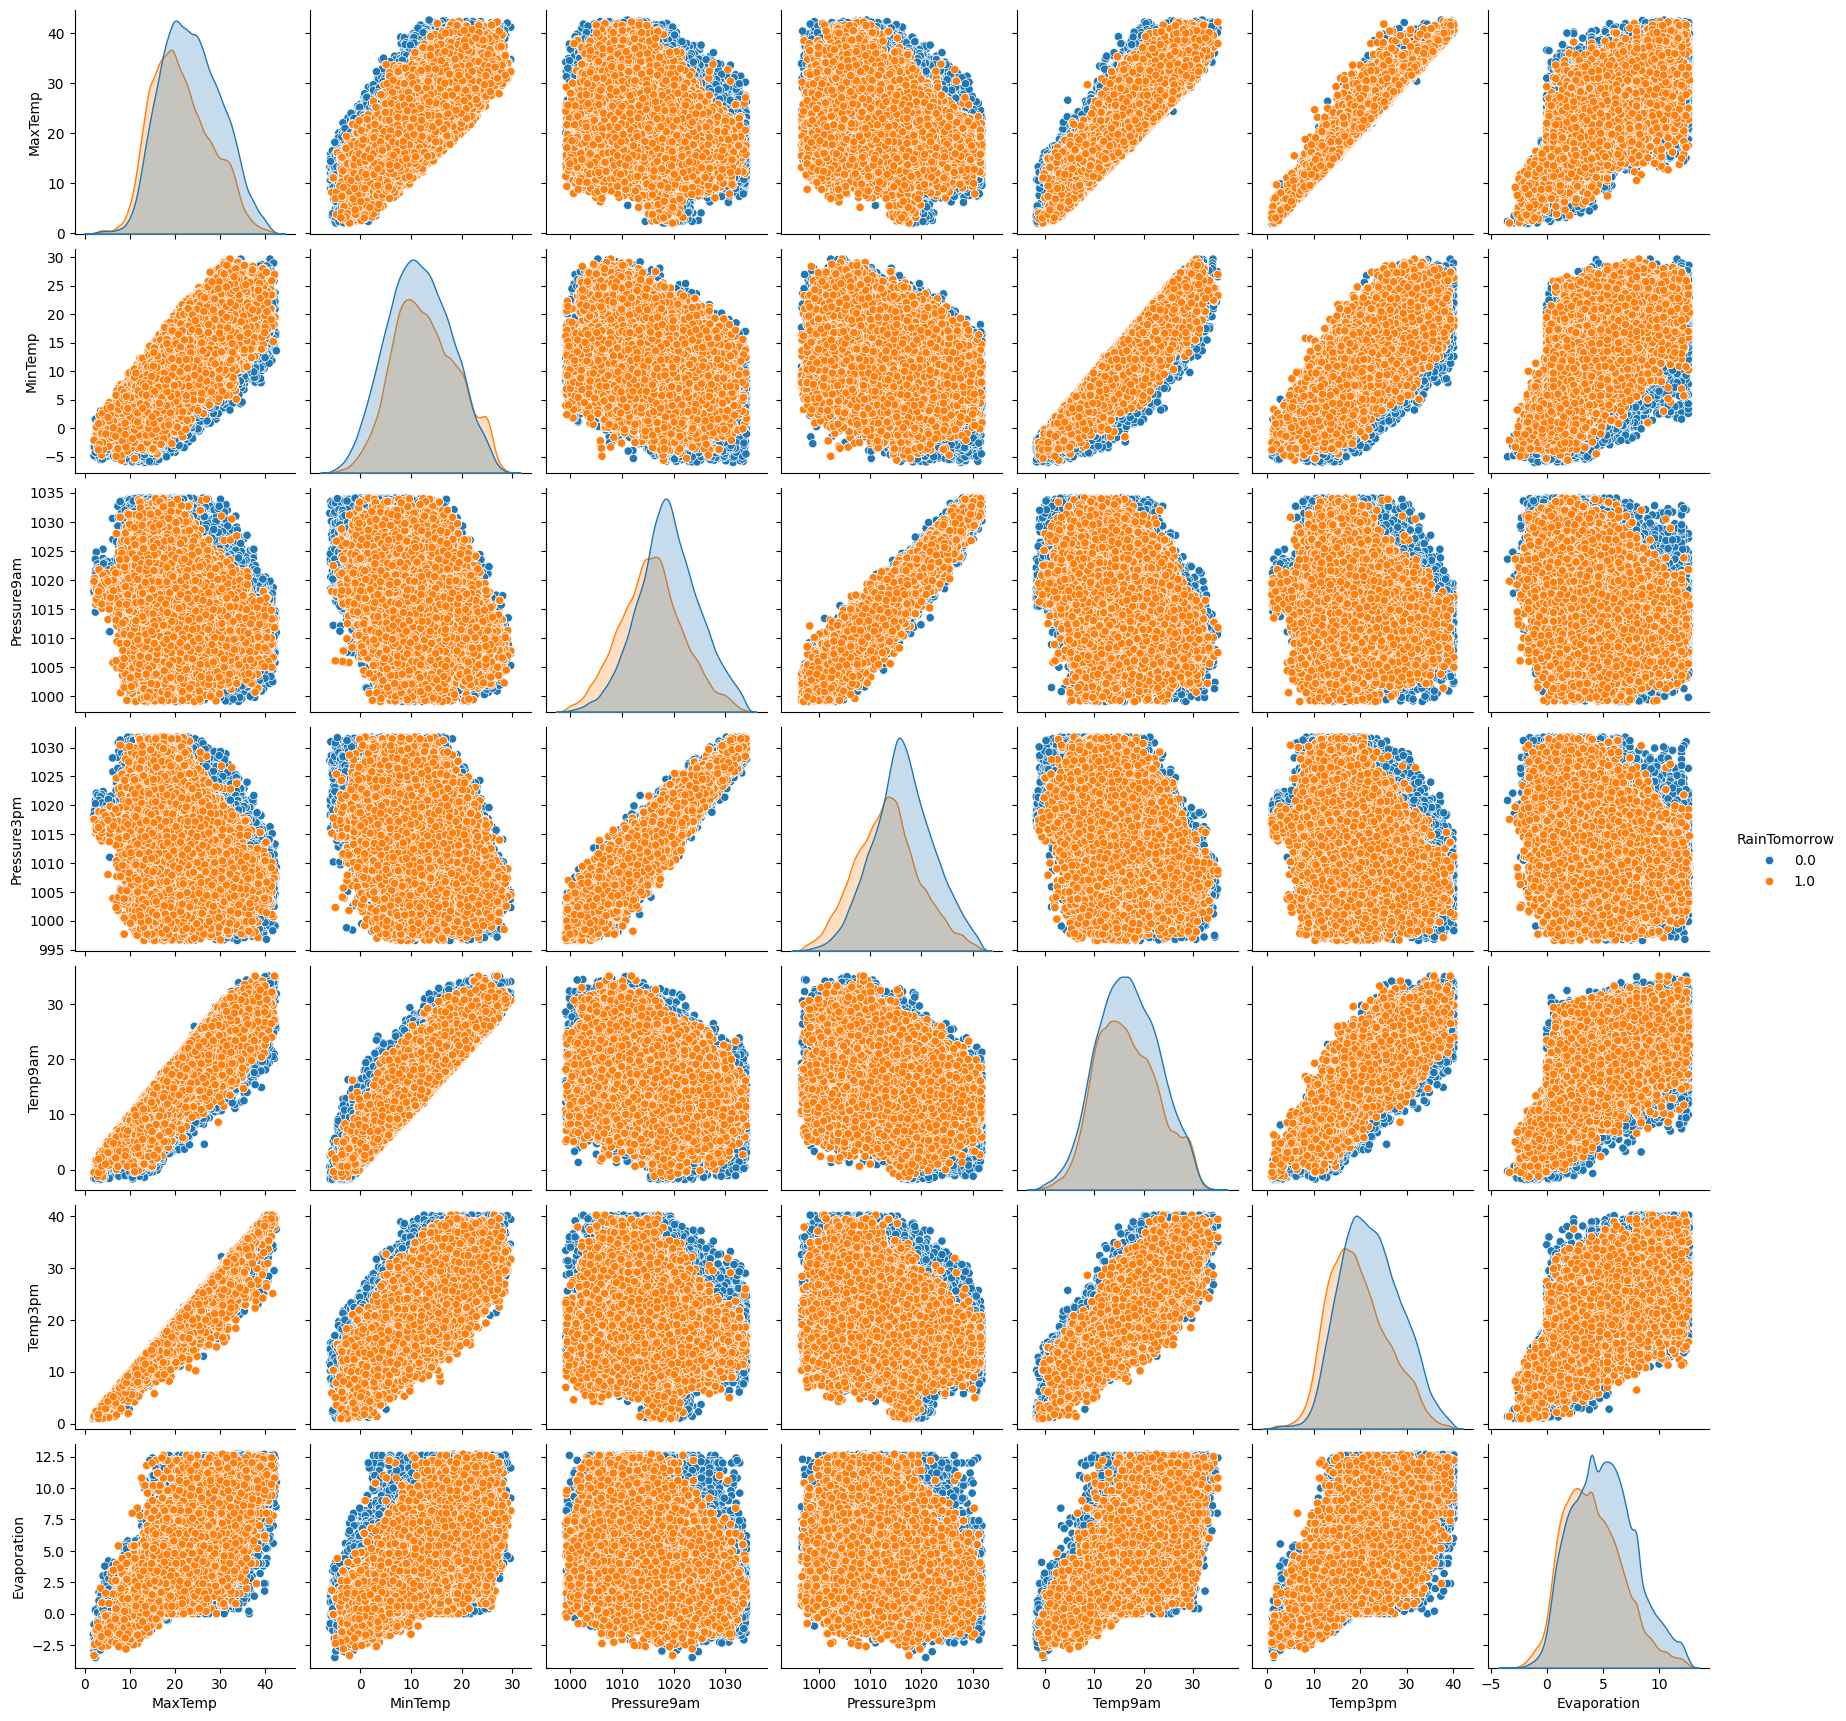

In [19]:
sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )


## Feature Selection for Rainfall Prediction
We will use both the filter method and the wrapper method for feature selection to train our rainfall prediction model.

Selecting features by filtering method (chi-square value): before doing this, we must first normalize our data. We use MinMaxScaler instead of StandardScaler in order to avoid negative values.

In [20]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [21]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')


### Selection of features by wrapping method (random forest):

In [22]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']
[0.03253427 0.02881107 0.03314079 0.03249158 0.02143225 0.03311921
 0.13843799 0.02077917 0.04263648 0.021398   0.02169729 0.02179529
 0.02339751 0.0344056  0.10634039 0.0483552  0.06129439 0.05797767
 0.13958632 0.03162141 0.03627126 0.01247686]


## Training Rainfall Prediction Model with Different Models
We will divide the dataset into training (75%) and test (25%) sets respectively to train the rainfall prediction model. For best results, we will standardize our X_train and X_test data:

In [23]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [24]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [25]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score,  roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    

    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.8530280303740508
ROC Area under Curve = 0.8536035328076015
Cohen's Kappa = 0.703412530274429
Time taken = 0.42762303352355957
              precision    recall  f1-score   support

         0.0    0.88398   0.84878   0.86602     23879
         1.0    0.81707   0.85843   0.83724     18789

    accuracy                        0.85303     42668
   macro avg    0.85053   0.85360   0.85163     42668
weighted avg    0.85452   0.85303   0.85335     42668



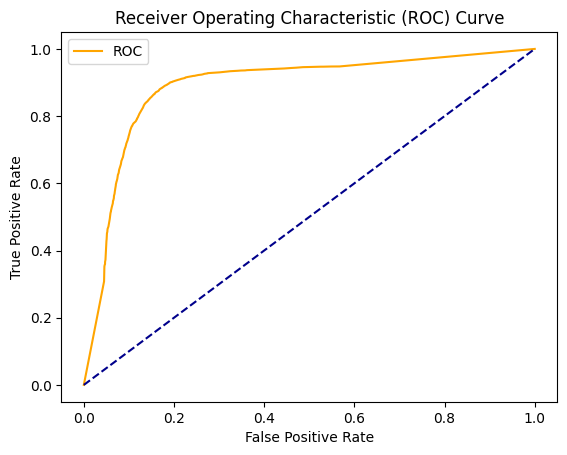

In [26]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)



Epoch 1/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 3s 623us/step - accuracy: 0.7889 - loss: 0.4479 - val_accuracy: 0.8123 - val_loss: 0.4073
Epoch 2/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 2s 589us/step - accuracy: 0.8221 - loss: 0.3938 - val_accuracy: 0.8399 - val_loss: 0.3667
Epoch 3/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 2s 591us/step - accuracy: 0.8421 - loss: 0.3573 - val_accuracy: 0.8510 - val_loss: 0.3454
Epoch 4/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 2s 582us/step - accuracy: 0.8510 - loss: 0.3390 - val_accuracy: 0.8538 - val_loss: 0.3340
Epoch 5/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 2s 582us/step - accuracy: 0.8572 - loss: 0.3248 - val_accuracy: 0.8559 - val_loss: 0.3237
Epoch 6/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 2s 583us/step - accuracy: 0.8641 - loss: 0.3112 - val_accuracy: 0.8646 - val_loss: 0.3094
Epoch 7/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 2s 573us/step - accuracy: 0.8699 - loss: 0.3003 - val_accuracy: 0.8699 - val_loss: 0.3010
Epoch 8/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 2s 582us/step - accuracy: 0.8767 -

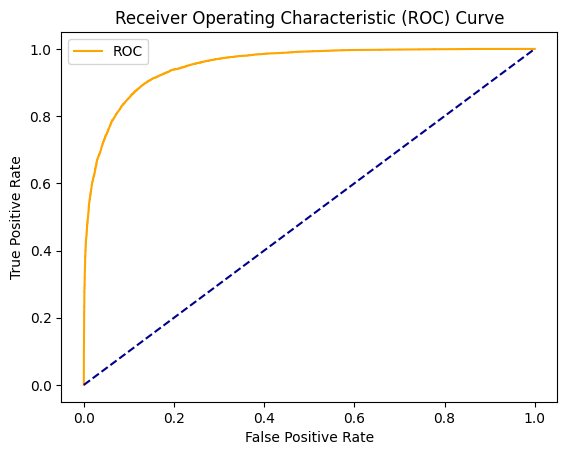

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, classification_report
import time
import matplotlib.pyplot as plt
def create_nn_model(input_shape):
    model = Sequential()
    model.add(Dense(64, input_dim=input_shape, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
def run_nn_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    
    if verbose:
        history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.1)
    else:
        history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.1)
    
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time() - t0

    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test, y_pred, digits=5))
    
    probs = model.predict(X_test)
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)
    
    return model, accuracy, roc_auc, coh_kap, time_taken
# Prepare features and target
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Fixed from `fit_transform` to `transform`

# Create and run neural network model
nn_model = create_nn_model(X_train.shape[1])
nn_model, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_nn_model(nn_model, X_train, y_train, X_test, y_test)


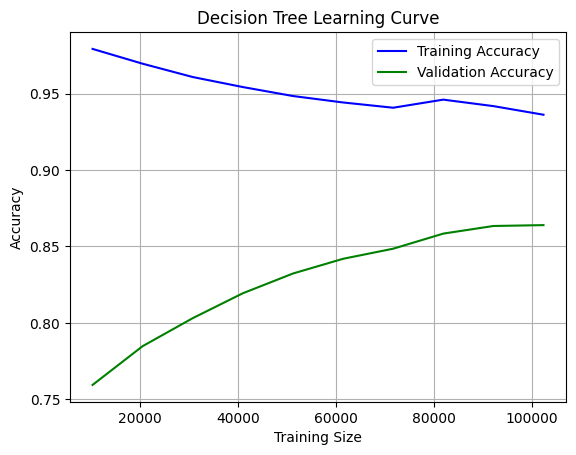

Epoch 1/50
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 3s 614us/step - accuracy: 0.7880 - loss: 0.4503 - val_accuracy: 0.8129 - val_loss: 0.4045
Epoch 2/50
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 2s 595us/step - accuracy: 0.8217 - loss: 0.3957 - val_accuracy: 0.8331 - val_loss: 0.3710
Epoch 3/50
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 2s 569us/step - accuracy: 0.8435 - loss: 0.3581 - val_accuracy: 0.8497 - val_loss: 0.3380
Epoch 4/50
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 2s 570us/step - accuracy: 0.8541 - loss: 0.3303 - val_accuracy: 0.8545 - val_loss: 0.3179
Epoch 5/50
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 2s 567us/step - accuracy: 0.8607 - loss: 0.3130 - val_accuracy: 0.8623 - val_loss: 0.3084
Epoch 6/50
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 2s 571us/step - accuracy: 0.8679 - loss: 0.2990 - val_accuracy: 0.8685 - val_loss: 0.2949
Epoch 7/50
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 2s 572us/step - accuracy: 0.8749 - loss: 0.2831 - val_accuracy: 0.8792 - val_loss: 0.2803
Epoch 8/50
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 2s 576us/step - accuracy: 0.8803 -

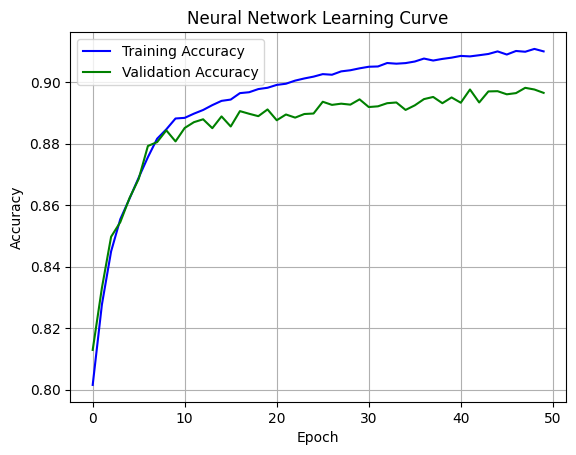

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

# Plot learning curves for Decision Tree
def plot_learning_curve(estimator, X_train, y_train, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, 
                                                            cv=5, scoring='accuracy', 
                                                            train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='green')
    
    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Decision Tree Learning Curve
model_dt = DecisionTreeClassifier(max_depth=16, max_features="sqrt")
plot_learning_curve(model_dt, X_train, y_train, "Decision Tree Learning Curve")

# Neural Network Learning Curve
def plot_nn_learning_curve(history, title):
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
    
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Train the neural network and plot learning curve
nn_model = create_nn_model(X_train.shape[1])
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.1)

# Neural Network Learning Curve
plot_nn_learning_curve(history, "Neural Network Learning Curve")


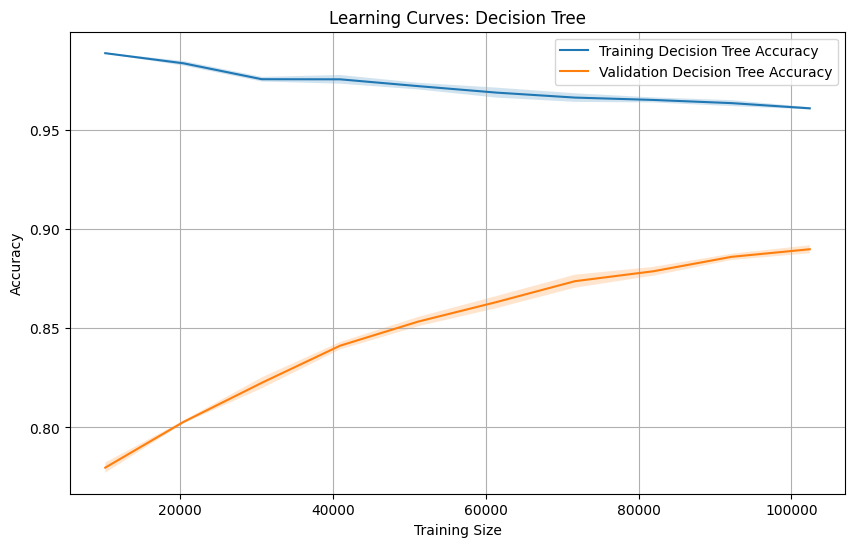

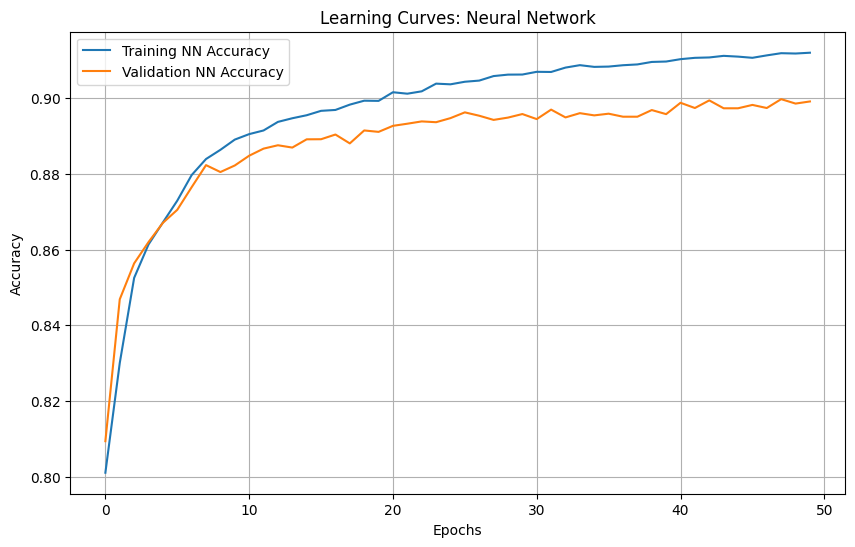

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Prepare features and target
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=16, random_state=12345)

# Neural Network Model
def create_nn_model(input_shape):
    model = Sequential()
    model.add(Dense(64, input_dim=input_shape, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = create_nn_model(X_train.shape[1])

# Plot Learning Curves
def plot_learning_curves(model, X, y, model_name, epochs=None):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy'
    )
    
    # Calculate mean and std for train and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label=f"Training {model_name} Accuracy")
    plt.plot(train_sizes, test_scores_mean, label=f"Validation {model_name} Accuracy")
    
    # Fill between std
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2)

    plt.title(f"Learning Curves: {model_name}")
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Plot for Decision Tree
plot_learning_curves(dt_model, X_train, y_train, "Decision Tree")

# Plot for Neural Network (manually fit with epochs)
history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

# Plot Neural Network Learning Curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label="Training NN Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation NN Accuracy")
plt.title("Learning Curves: Neural Network")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


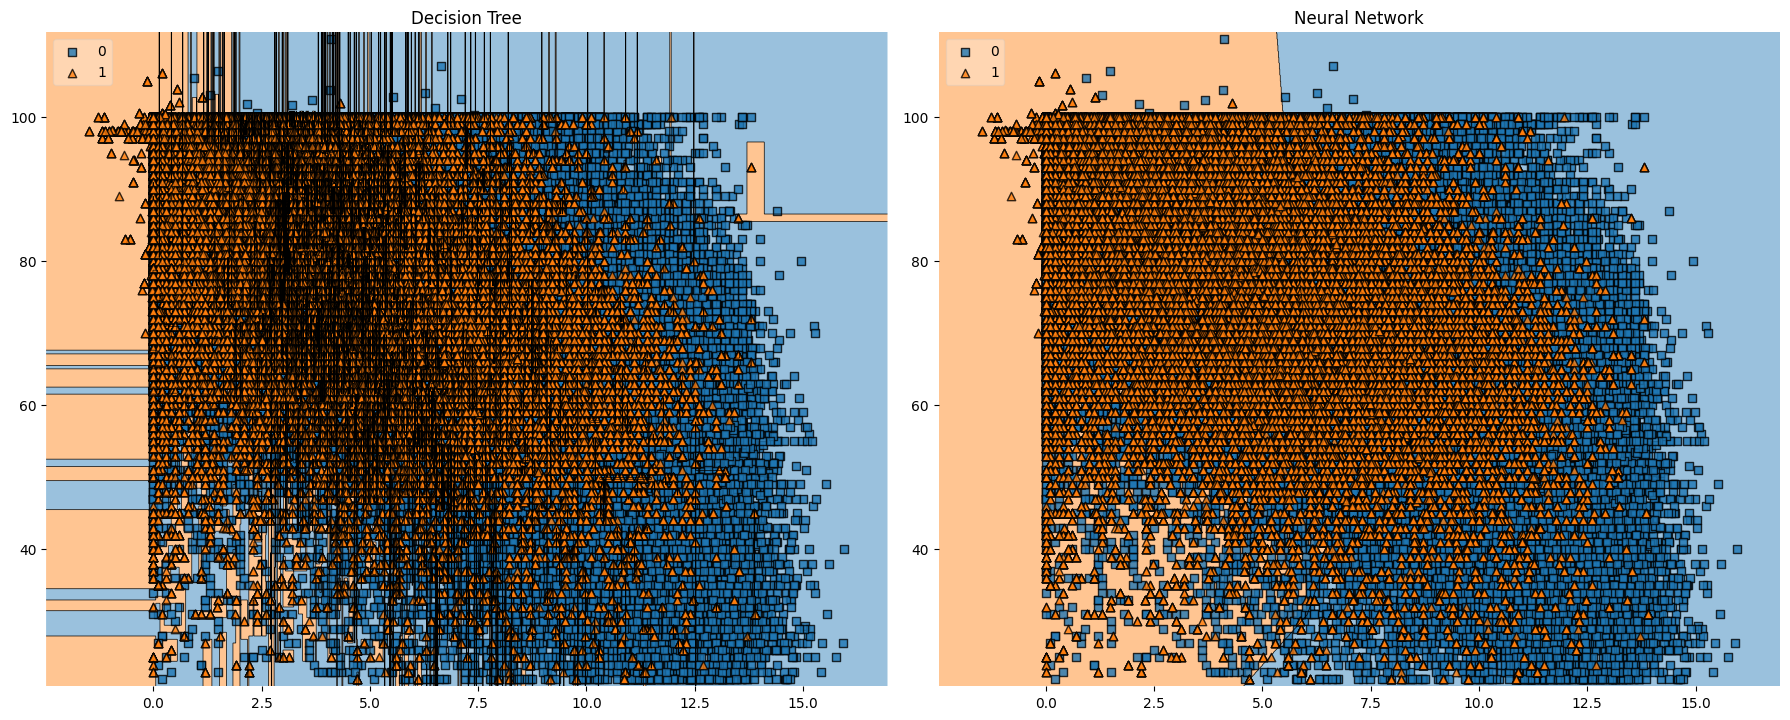

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from mlxtend.plotting import plot_decision_regions

# Classifiers
clf2 = DecisionTreeClassifier(random_state=12345)
clf3 = MLPClassifier(random_state=12345, verbose=0)

# Use only two features for 2D plotting
X_list = MiceImputed[["Sunshine", "Humidity9am"]]  # Choose two features for plotting
X = np.asarray(X_list, dtype=np.float32)
y_list = MiceImputed["RainTomorrow"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)  # Adjusted for 3 classifiers
fig = plt.figure(figsize=(18, 14))

labels = ['Decision Tree', 'Neural Network']

# Loop over classifiers and plot their decision boundaries
for clf, lab, grd in zip([clf2, clf3], labels, itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)  # Fit the model
    ax = plt.subplot(gs[grd[0], grd[1]])  # Create subplot
    plot_decision_regions(X=X, y=y, clf=clf, legend=2)  # Plot decision regions
    plt.title(lab)  # Add title

plt.tight_layout()
plt.show()


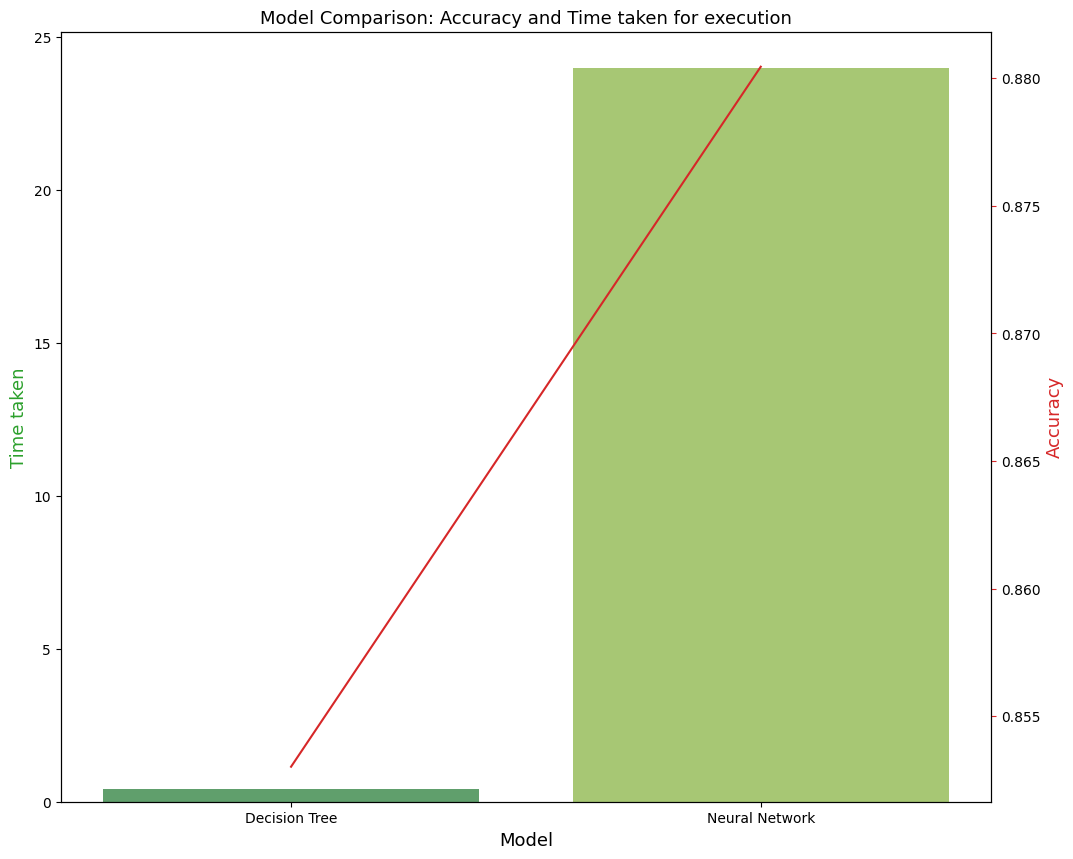

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've calculated these values for Decision Tree, Neural Network, and Random Forest
accuracy_scores = [accuracy_dt, accuracy_nn]
roc_auc_scores = [roc_auc_dt, roc_auc_nn]
coh_kap_scores = [coh_kap_dt, coh_kap_nn]
tt = [tt_dt, tt_nn]

# Update the model names
model_data = {
    'Model': ['Decision Tree', 'Neural Network'],
    'Accuracy': accuracy_scores,
    'ROC_AUC': roc_auc_scores,
    'Cohen_Kappa': coh_kap_scores,
    'Time taken': tt
}

# Create DataFrame
data = pd.DataFrame(model_data)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)

# Plot for Time taken
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data=data, palette='summer')
ax1.tick_params(axis='y')

# Plot for Accuracy
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data=data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

# Display plot
plt.show()


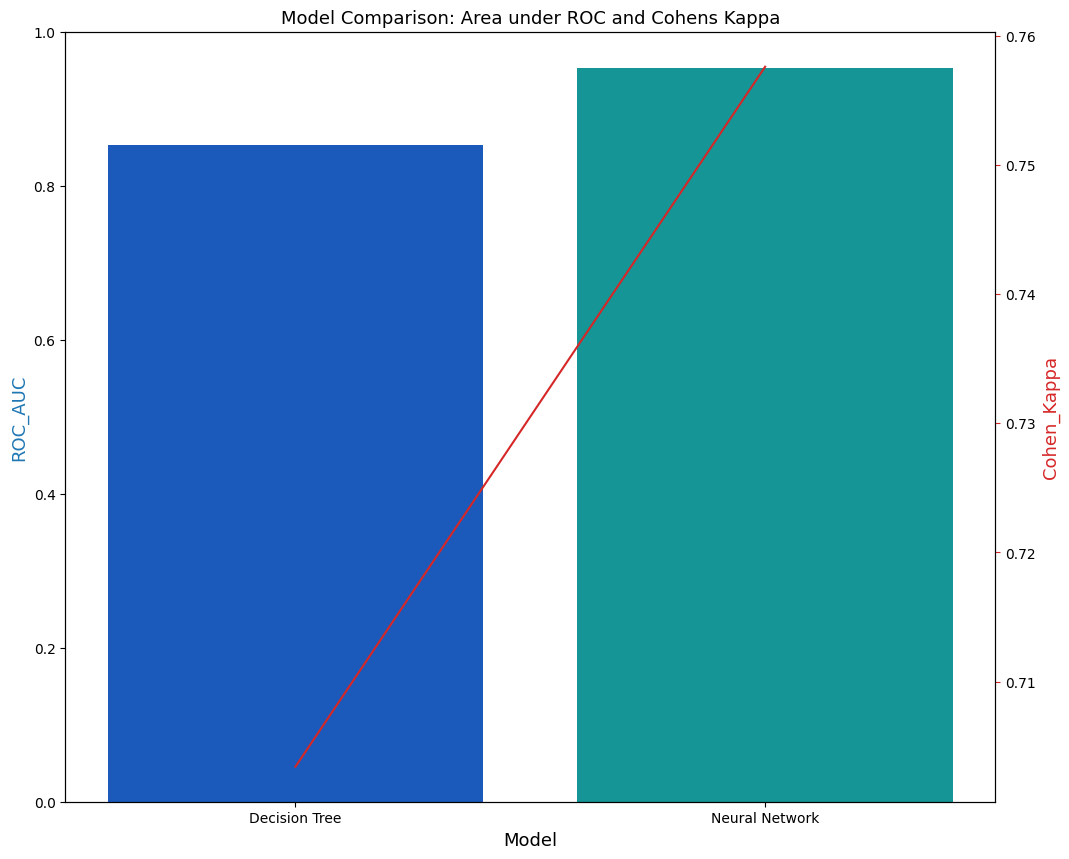

In [40]:
# Plotting for ROC AUC and Cohen's Kappa comparison for Decision Tree, Neural Network, and Random Forest
fig, ax3 = plt.subplots(figsize=(12, 10))

# Title and Labels
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)

# Barplot for ROC_AUC
ax4 = sns.barplot(x='Model', y='ROC_AUC', data=data, palette='winter')
ax3.tick_params(axis='y')

# Lineplot for Cohen's Kappa
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data=data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)

# Display the plot
plt.show()
